# Linear Regression on Network Traffic

In [1]:
# Machine Learning Libraries
import numpy as np
import pandas as pd
from sklearn import linear_model

# Plotting Library
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,6)

# Allow us to load modules from the parent directory
import sys
sys.path.append("../lib") 

# Libraries for Processing Network Traffic
import ipaddress
import netaddr
from parse_pcap import pcap_to_pandas, pcap_to_dict

In [2]:
pcap = pcap_to_pandas('../pcaps/pcap-20210604.pcap')
pcap = pcap.loc[:,['datetime','ip_src','ip_dst',
                   'length','port_src','port_dst','protocol']]

pcap['packets'] = 1
unique_flows = pcap.groupby(['ip_src', 'ip_dst', 'port_src', 'port_dst', 'protocol'])
udf = pd.DataFrame(unique_flows.agg(np.sum))
udf

length  packets
ip_src          ip_dst       port_src port_dst protocol                 
107.152.29.202  192.168.1.58 443.0    53440.0  TCP          519        2
                                      53486.0  TCP         3893        7
134.224.187.167 192.168.1.58 443.0    52571.0  TCP         9769       46
                             8801.0   51065.0  UDP          123        1
                                      57923.0  UDP       395557      524
...                                                         ...      ...
52.2.208.199    192.168.1.58 443.0    50629.0  TCP          189        2
                                      50762.0  TCP          189        2
                                      50767.0  TCP          189        2
54.163.224.3    192.168.1.58 443.0    50708.0  TCP          189        2
54.164.13.198   192.168.1.58 443.0    50578.0  TCP          123        1

[90 rows x 2 columns]

In [3]:
x = udf['packets'].values
y = udf['length'].values

In [4]:
###########
# Step 1: Create Linear Regression Model
linear_regression = linear_model.LinearRegression()

# Step 2: Train the Model Using the (x,y) Points
# Note: Reshape (-1,1) creates a column vector, which is what fit() expects.
linear_regression.fit(x.reshape(-1,1), y)

# Step 3: Input to predict function are x values that the model has never seen.
y_hat = linear_regression.predict(np.array([-2,1000]).reshape(-1,1))
###########

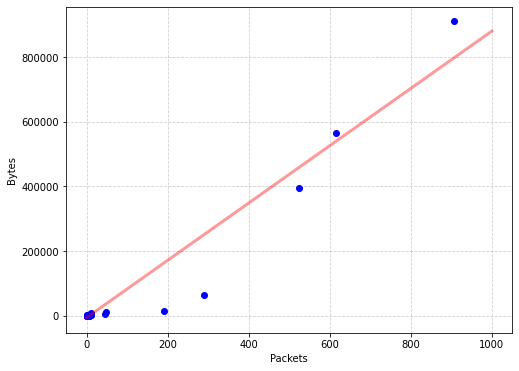

In [5]:
# Plot the results along with the points and previous line
# Plot the original points.
plt.plot(x, y, '.', color='blue', markersize=12)

# Predicted line from sklearn is in red
plt.plot([-2, 1000], y_hat, color='red', alpha=0.4, linewidth=3)

plt.grid(linestyle='--', alpha=0.6)
plt.xlabel('Packets')
plt.ylabel('Bytes')
plt.show()

### Evaluation: Error Computation

You can compute how well your manual fit is by computing the error, in terms of residual sum of squares.

In [6]:
from sklearn.metrics import mean_squared_error

rss = mean_squared_error(y, linear_regression.predict(x.reshape(-1,1)))
rss

861640898.1231976

## Polynomial Basis Expansion

Recall that one of the benefits of a polynomial feature expansion is that it is possible to fit a linear model to the resulting polynomial expansion.

We will do that below.  Let's first create the regular features and then the polynomial expansion.

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_x = poly.fit_transform(x.reshape(-1,1))


linear_regression.fit(poly_x, y)

LinearRegression()

In [8]:
y_hat_poly = linear_regression.predict(poly.fit_transform(np.arange(1,1000,1).reshape(-1,1)))
y_hat_poly

array([ 1.73430966e+03,  1.12718947e+03,  5.27680039e+02, -6.42320354e+01,
       -6.48560175e+02, -1.22531780e+03, -1.79451832e+03, -2.35617517e+03,
       -2.91030175e+03, -3.45691149e+03, -3.99601780e+03, -4.52763411e+03,
       -5.05177382e+03, -5.56845037e+03, -6.07767716e+03, -6.57946761e+03,
       -7.07383515e+03, -7.56079319e+03, -8.04035515e+03, -8.51253444e+03,
       -8.97734449e+03, -9.43479872e+03, -9.88491053e+03, -1.03276934e+04,
       -1.07631606e+04, -1.11913257e+04, -1.16122021e+04, -1.20258031e+04,
       -1.24321423e+04, -1.28312329e+04, -1.32230885e+04, -1.36077225e+04,
       -1.39851482e+04, -1.43553791e+04, -1.47184287e+04, -1.50743102e+04,
       -1.54230372e+04, -1.57646231e+04, -1.60990812e+04, -1.64264251e+04,
       -1.67466680e+04, -1.70598235e+04, -1.73659050e+04, -1.76649258e+04,
       -1.79568994e+04, -1.82418393e+04, -1.85197587e+04, -1.87906712e+04,
       -1.90545902e+04, -1.93115290e+04, -1.95615011e+04, -1.98045200e+04,
       -2.00405990e+04, -

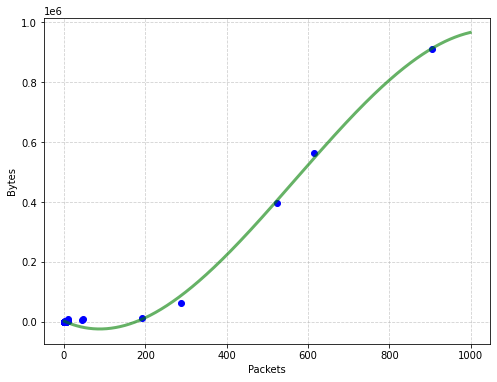

In [9]:
# Plot the results along with the points and previous line
# Plot the original points.
plt.plot(x, y, '.', color='blue', markersize=12)

# Plot the results along with the points and previous line
# Plot the original points.
plt.plot(np.arange(1,1000,1), y_hat_poly,  '-', color='green', linewidth=3, alpha=0.6)
plt.grid(linestyle='--', alpha=0.6)
plt.xlabel('Packets')
plt.ylabel('Bytes')
plt.show()

In [10]:
rss_poly = mean_squared_error(y, linear_regression.predict(poly.fit_transform(x.reshape(-1,1))))
improvement = rss - rss_poly

print('''
Original:\t\t\t{}
Polynomial Expansion:\t\t{}
Improvement:\t\t\t{}
'''.format(rss,rss_poly,improvement))


Original:			861640898.1231976
Polynomial Expansion:		31001399.15239412
Improvement:			830639498.9708034

